# WELCOME to this guided project "Object Recognition" on Coursera Labs! 😁 
#### This project course is part of "Tensorflow for Convolutional Neural Network" Series of project courses on Coursera.<br/><br/>

In this project, we will start coding, and we will go through 6 tasks:<br/> <br/>
👉🏻 **Task 1**: Introduction and Overview of the Project. <br/><br/>
👉🏻 **Task 2**: Imports and Download the Dataset. <br/><br/>
👉🏻 **Task 3**: Setup Data Dimensions and Plot Images. <br/><br/>
👉🏻 **Task 4**: Data preparation and configuration of the Model. <br/><br/>
👉🏻 **Task 5**: Create and Build the Neural Network. <br/><br/>
👉🏻 **Task 6**: Train the Neural Network. <br/><br/>
👉🏻 **Task 7**: Visualize the Results and Test the Model. <br/><br/>

## 👉🏻 Task 1: Introduction and Overview of the Project

Object Recognition is responding to the question "What is the object in the image?".

In this guided project, we will:
 - predict the sign language through applying LeNet CNN architecture. 
 - improve the model you can tube hyperparameters and use other CNN architecture.
 
At the end of this project, you will try out an amazing Bonus Exercise! 🤩

By Turkey Ankara Ayrancı Anadolu High School Students <br/>

Turkey Ankara Ayrancı Anadolu High School's Sign Language Digits Dataset <br/>


Overview the Data Set we will use:

- Image size: 64x64
- Color space: Grayscale
- File format: npy
- Number of classes: 10 (Digits: 0-9)
- Number of participant students: 218
- Number of samples per student: 10

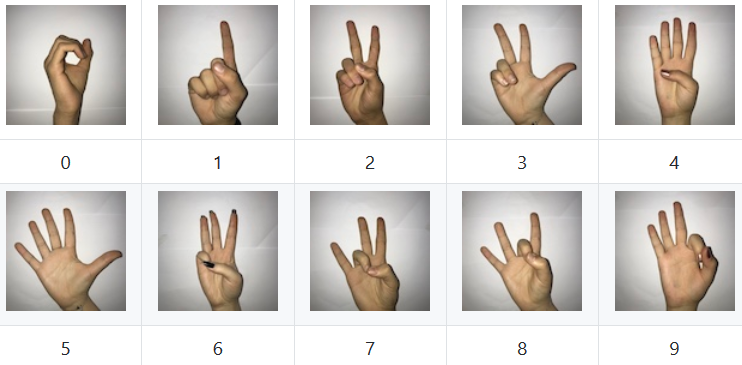

**LeNet-5 (1998)**:

LeNet-5, a pioneering 7-level convolutional network by LeCun et al in 1998, that classifies digits, was applied by several banks to recognise hand-written numbers on checks (cheques) digitized in 32x32 pixel images. The ability to process higher resolution images requires larger and more convolutional layers, so this technique is constrained by the availability of computing resources. For example, leNet-5 Start with an image of 32 x 32 x 1 and goal was to recognize handwritten digit. In the first step we use six 5 x 5 filter with stride 1 and get 28 x 28 x 6. With stride of 1 and no padding we reduce the dimension to 32 x 32 to 28 x 28. Then we use a average pooling with a filter width of 2 and stride of 2 and reduce the dimension by factor of 2 and end up with 14 x 14 x 6. Then we use another convolutional layer with sixteen 5 x 5 filter and end up with 10 x 10 x 16. That time people use valid padding that’s why each time height and weight shrinks. Then another pooling layer and end up with 5 x 5 x 16. Then the next layer is a fully connected layer with 120 nodes. The previous layers 400 (5*5*16) then connected with this 120 neurons. Then another layer this 120 nodes connected with a 84 node and use this to connected with Yhat with possible 10 values that will recognize digit from 0 to 9. But in modern version of this neural net we use softmax function with a ten wave classification output.

<img src="https://image.ibb.co/hydtzx/1_l_0_Pe_Sh3o_L2_Wc2ri2s_VWA.png" alt="1 l 0 Pe Sh3o L2 Wc2ri2s VWA" border="0" />

## 👉🏻 Task 2: Imports and Download the Dataset

In [1]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
from subprocess import check_output

%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
# import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math

from sklearn.model_selection import train_test_split

In [3]:
import glob
import os
import math
import operator
import functools
import random
import datetime
from scipy.ndimage.interpolation import rotate, shift, zoom

In [4]:
all_X = np.load('X.npy')
all_Y = np.load('Y.npy')

In [5]:
# Train Test split
test_size =  0.15 ### YOUR CODE HERE
X_train, X_test, Y_train, Y_test = train_test_split(all_X, all_Y, test_size=test_size, random_state=42)

In [6]:
print('Training shape:', X_train.shape)
print(X_train.shape[0], 'sample,',X_train.shape[1] ,'x',X_train.shape[2] ,'size grayscale image.\n')
print('Test shape:', X_test.shape)
print(X_test.shape[0], 'sample,',X_test.shape[1] ,'x',X_test.shape[2] ,'size grayscale image.\n')

Training shape: (1752, 64, 64)
1752 sample, 64 x 64 size grayscale image.

Test shape: (310, 64, 64)
310 sample, 64 x 64 size grayscale image.



In [8]:
# Train and test classification between 0-10
Y_test_cls = np.argmax(Y_test, axis=1)
Y_train_cls = np.argmax(Y_train, axis=1)

## 👉🏻 Task 3: Setup Data Dimensions and Plot Images


### ⭐ Setup Data Dimensions
The data dimensions are used in several places in the source-code below. They are defined once so we can use these variables instead of numbers throughout the source-code below

In [9]:
# We know that MNIST images are 28 pixels in each dimension.
img_size =  64 ### YOUR CODE HERE

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels =  1 ### YOUR CODE HERE

# Number of classes, one class for each of 10 digits.
num_classes = 10  ### YOUR CODE HERE

### ⭐ Plot Images
Function used to plot 9 images in a 3x3 grid, and writing the true and predicted classes below each image.

In [10]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots (3,3 )### YOUR CODE HERE
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    plt.show()

**Let's now Plot a few images to see if data is correct**
#### Get the first images from the test-set.

In [11]:
images =  X_test [0:9]### YOUR CODE HERE

#### Get the true classes for those images.

In [12]:
cls_true =  Y_test_cls [0:9]### YOUR CODE HERE

#### Plot the images and labels using our helper-function above.

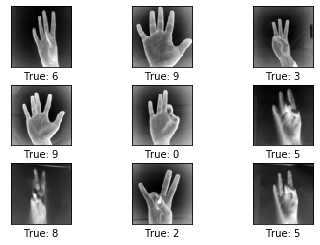

In [13]:
plot_images(images=images, cls_true=cls_true)

## 👉🏻 Task 4: Data preparation and configuration of the Model

In [14]:
train_X =  X_train ### YOUR CODE HERE
train_Y = Y_train ### YOUR CODE HERE
new_train_X = train_X.reshape(X_train.shape[0],img_size_flat)
new_test_X = X_test.reshape(X_test.shape[0],img_size_flat)

In [15]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=new_train_X.shape))
print("Training set (labels) shape: {shape}".format(shape=train_Y .shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=new_test_X.shape))
print("Test set (labels) shape: {shape}".format(shape=Y_test.shape))


Training set (images) shape: (1752, 4096)
Training set (labels) shape: (1752, 10)
Test set (images) shape: (310, 4096)
Test set (labels) shape: (310, 10)


The configuration of the Convolutional Neural Network is defined here for convenience, so you can easily find and change these numbers and re-run the Notebook.

In [16]:
# architecture hyper-parameter
learning_rate =  0.001 ### YOUR CODE HERE
training_iters =  4000 ### YOUR CODE HERE
batch_size =  16 ### YOUR CODE HERE
display_step = 20  ### YOUR CODE HERE

n_input = img_size_flat # 64x64 image
dropout =  0.75 ### YOUR CODE HERE

## 👉🏻 Task 5: Create and Build the Neural Network

The entire purpose of TensorFlow is to have a so-called computational graph that can be executed much more efficiently than if the same calculations were to be performed directly in Python. TensorFlow can be more efficient than NumPy because TensorFlow knows the entire computation graph that must be executed, while NumPy only knows the computation of a single mathematical operation at a time.

🧮TensorFlow can also automatically calculate the gradients that are needed to optimize the variables of the graph so as to make the model perform better. This is because the graph is a combination of simple mathematical expressions so the gradient of the entire graph can be calculated using the chain-rule for derivatives.

A TensorFlow graph consists of the following parts which will be detailed below 👇🏼:
- Placeholder variables used for inputting data to the graph.
- Variables that are going to be optimized so as to make the convolutional network perform better.
- The mathematical formulas for the convolutional network.
- A cost measure that can be used to guide the optimization of the variables.
- An optimization method which updates the variable

👉🏿**Placeholder variables** <br/>
Placeholder variables serve as the input to the TensorFlow computational graph that we may change each time we execute the graph. We call this feeding the placeholder variables and it is demonstrated further below.
First we define the placeholder variable for the input images. This allows us to change the images that are input to the TensorFlow graph. This is a so-called tensor, which just means that it is a multi-dimensional vector or matrix. 

In [17]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, num_classes])
keep_prob = tf.placeholder(tf.float32)
print('Shape of placeholder',x.shape, y.shape)

Instructions for updating:
non-resource variables are not supported in the long term
Shape of placeholder (?, 4096) (?, 10)


**convolution for 2 dimensions**:

**SAME padding**


sometimes called **HALF padding**. It is called SAME because for a convolution with a stride=1, (or for pooling) it should produce output of the same size as the input. It is

$p = [k/2]$

called HALF because for a kernel of size k [12]. "SAME" tries to pad evenly left and right, but if the amount of columns to be added is odd, it will add the extra column to the right, as is the case in this example (the same logic applies vertically: there may be an extra row of zeros at the bottom).

In [24]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return  tf.nn.relu(x)### YOUR CODE HERE --- RETURN RELU FUNCTION

**MaxPool**

In [25]:
def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

In [29]:
def conv_net(x, weights, biases, dropout):
    # reshape input to 64x64 size
    x = tf.reshape(x, shape=[-1, 64, 64, 1])
    

    # Convolution layer 1
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max pooling
    conv1 = maxpool2d(conv1, k=2)

    # Convolution layer2
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    ### YOUR CODE HERE - CREATE THE SECOND CONV. LAYER
    # Max pooling
    conv2 = maxpool2d(conv2, k=2)
    ### YOUR CODE HERE - CREATE THE SECOND POOLING LAYER
    

    # Fully connected layer
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1) # layer
    fc1 = tf.nn.dropout(fc1, dropout)

    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [30]:
weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32]),name='wc1'),
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64]),name='wc2'),
    'wd1': tf.Variable(tf.random_normal([64 * 64 * 4, 1024]),name='wd1'),
    'out': tf.Variable(tf.random_normal([1024, num_classes]),name='wout')
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32]),name='bc1'),
    'bc2': tf.Variable(tf.random_normal([64]),name='bc2'),
    'bd1': tf.Variable(tf.random_normal([1024]),name='bd1'),
    'out': tf.Variable(tf.random_normal([num_classes]),name='bout')
}

⭐ **Optimization Method**

Now that we have a cost measure that must be minimized, we can then create an optimizer. In this case it is the AdamOptimizer which is an advanced form of Gradient Descent.

Note that optimization is not performed at this point. In fact, nothing is calculated at all, we just add the optimizer-object to the TensorFlow graph for later execution.

⭐ **Performance Measures**

We need a few more performance measures to display the progress to the user.

In [31]:
# Create the model
model = conv_net(x, weights, biases, keep_prob)
print(model)
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=model, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
y_true_cls =  tf.argmax(y, 1)
y_pred_cls = tf.argmax(model, 1)
# This is a vector of booleans whether the predicted 
#class equals the true class of each image.
correct_model = tf.equal(y_pred_cls,y_true_cls)
# This calculates the classification accuracy by first type-casting 
#the vector of booleans to floats, so that False becomes 0 and True becomes 1,
#and then calculating the average of these numbers.
accuracy = tf.reduce_mean(tf.cast(correct_model, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()

Tensor("Add_3:0", shape=(?, 10), dtype=float32)


## 👉🏻 Task 6: Train the Neural Network

**Get Batch**

Get Batch: defines number of samples that going to be propagated through the network.
Batch Size : Total number of training examples present in a single batch.
We can’t pass the entire dataset into the neural net at once. So, you divide dataset into Number of Batches or sets or parts.

In [32]:
def getBatch(X, Y, batchSize=16):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input train/test 
    Y --input label train/test
    
    Returns:
    mini_batches -- tuple of synchronous (mini_batch_X, mini_batch_Y)
    
    """
    arrayLength = X.shape[0]
    count = 0 
    
    while count < arrayLength/batchSize:
        random.seed(datetime.datetime.now())
        randstart = random.randint(0, arrayLength-batchSize-1)
#         print(randstart)
        count += 1
        yield (X[randstart:randstart+batchSize], Y[randstart:randstart+batchSize]) 


In [33]:
loss_t = []
steps_t = []
acc_t = []

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    step = 1   
#     Keep training until reach max iterations
    while step * batch_size < training_iters:
        a = getBatch(new_train_X,train_Y, batch_size)
        batch_x, batch_y = next(a)
        sess.run(optimizer, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
        if step % display_step == 0:
            print('*'*15)
            loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                                                              y: batch_y,
                                                              keep_prob: 1.})
            print("Iter " + str(step*batch_size) + ", Loss= " + \
                  "{:.3f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))
            loss_t.append(loss)
            steps_t.append(step*batch_size)
            acc_t.append(acc)
        step += 1
    
   #
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={x: new_test_X,
                                      y: Y_test,
                                      keep_prob: 1.}))
    
    cls_pred = sess.run(y_pred_cls, feed_dict={x: new_test_X,
                                      y: Y_test,
                                      keep_prob: 1.})


***************
Iter 320, Loss= 92055.516, Training Accuracy= 0.188
***************
Iter 640, Loss= 39355.816, Training Accuracy= 0.312
***************
Iter 960, Loss= 36421.750, Training Accuracy= 0.250
***************
Iter 1280, Loss= 29941.773, Training Accuracy= 0.312
***************
Iter 1600, Loss= 19124.375, Training Accuracy= 0.188
***************
Iter 1920, Loss= 34260.129, Training Accuracy= 0.188
***************
Iter 2240, Loss= 17354.713, Training Accuracy= 0.438
***************
Iter 2560, Loss= 6797.686, Training Accuracy= 0.438
***************
Iter 2880, Loss= 4726.813, Training Accuracy= 0.625
***************
Iter 3200, Loss= 10313.941, Training Accuracy= 0.500
***************
Iter 3520, Loss= 6382.508, Training Accuracy= 0.688
***************
Iter 3840, Loss= 7074.248, Training Accuracy= 0.562
Testing Accuracy: 0.61612904


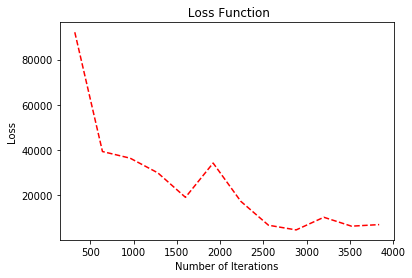

In [39]:
plt.plot(steps_t, loss_t, 'r--')

### YOUR CODE HERE - PLOT THE TITLE, X LABEL, and Y LABEL
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.title(" Loss Function")


plt.show()

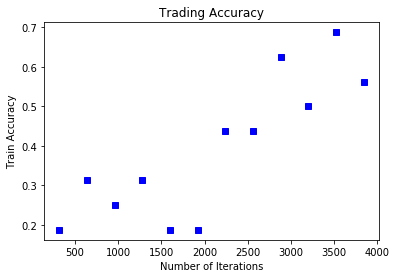

In [38]:
plt.plot(steps_t, acc_t,'bs')

### YOUR CODE HERE - PLOT THE TITLE, X LABEL, and Y LABEL
plt.title("Trading Accuracy")
plt.xlabel ("Number of Iterations")
plt.ylabel("Train Accuracy")
plt.show()

## 👉🏻 Task 7: Visualize the Results and Test the Model
**Test Accuracy**

In [40]:
# Create a boolean array whether each image is correctly classified.
correct = (Y_test_cls == cls_pred)

# Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
correct_sum = correct.sum()
num_test = X_test.shape[0]
# Classification accuracy is the number of correctly classified
# images divided by the total number of images in the test-set.
acc = float(correct_sum) / num_test
# Print the accuracy.
msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
print(msg.format(acc, correct_sum, num_test))

Accuracy on Test-Set: 61.6% (191 / 310)


**Plot Misclassification**

In [41]:
def plot_example_errors(cls_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images =new_test_X[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = Y_test_cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

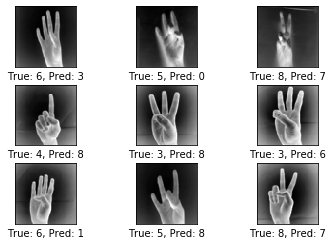

In [42]:
plot_example_errors(cls_pred=cls_pred, correct=correct)

In [46]:
def plot_confusion_matrix(cls_pred):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    cls_true = Y_test_cls
    
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    plt.show()

[[17  0  0  1  0  5  0  1  0  3]
 [ 1 30  0  0  0  0  0  0  1  0]
 [ 2  1 14  1  0 14  1  1  6  2]
 [ 0  1  0 19  0  0  2  2  3  1]
 [ 1  2  0  1  6  2  1  4  7  0]
 [ 1  1  0  3  0 21  0  0  1  1]
 [ 1  2  3  4  0  6 10  0  0  4]
 [ 0  0  0  0  0  0  0 25  4  1]
 [ 0  2  2  8  0  1  0  2 19  0]
 [ 0  0  0  0  0  1  0  4  0 30]]


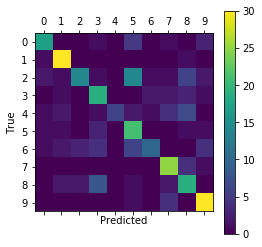

In [45]:
plot_confusion_matrix(cls_pred=cls_pred)

Conclusion:
- As we see, We could predict the sign language by the ~80% accuracy through apply LeNet CNN. 
- To improve this model you can tube hyperparameters and use other CNN architecture.


## Bonus: Extra Exercise!
_Refresh Your Memory Or Take New Informations..._ 😋

#### 👉🏻 A simple network 

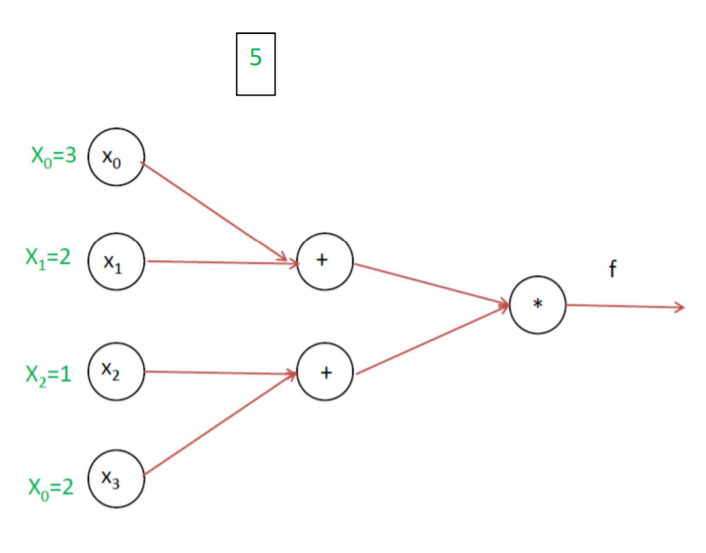

Perform backpropagation on this graph 🤔 <br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .

Backpropagated values in red.
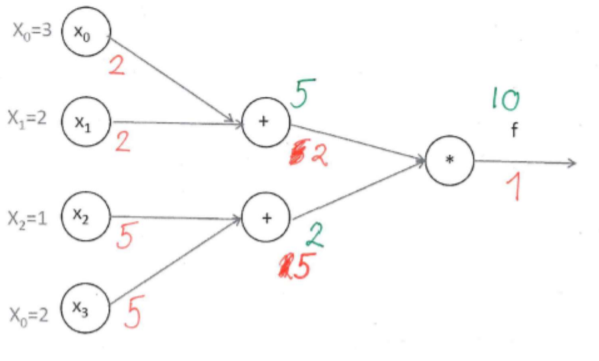

**👉🏻Basic neural networks** <br/>
#### 👉🏻 Questions:
1. What are the problems with using a sigmoid activation function? 
2. In what way does the tanh activation function share the same drawbacks? 
3. Why is initializing all the weights to zero problematic? 
<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> .<br/> . <br/> . <br/>


#### 👉🏻 Answers:
1. Basically two main problems, it kill gradients, and is not zero-centered. 
2. It is zero-centered, but still kills gradients. 
3. If all weights are equal, nodes will learn the same thing during backpropagation, and this limits the capacity. 


Back To <a href="convolutional-neural-networks-tensorflow-1-.ipynb">Tasks Page. ↩</a>